pip install google-play-scraper AND 
pip install app_store_scraper

# Data extraction

Retrieving data from the 3 main feedback platforms :

    Google Play
    Apple Store
    Trustpilot

Then storing of the reviews of each platform into 1 csv doc.

Installation of pip install google-play-scraper to scrap app reviews

In [ ]:
!pip install google-play-scraper
!pip install app_store_scraper

     |████████████████████████████████| 52 kB 622 kB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.2-py3-none-any.whl size=24393 sha256=d5f8c4d483b1f45f160256e72227922496332089d7cde526ac077f05c5d58144
  Stored in directory: /root/.cache/pip/wheels/98/99/eb/bbb9d24a5c526980647efc10336eaaeffcf07749f581111128
Successfully built google-play-scraper


In [ ]:
# Import relevant libraries and packages
import pandas as pd
import numpy as np
import pickle

import requests
from bs4 import BeautifulSoup
import json

from google_play_scraper import app
from app_store_scraper import AppStore

**1. Google Play**

google app id => "com.app.tgtg"

In [ ]:
# Retrieving app reviews from google play 
from google_play_scraper import Sort, reviews_all

reviews_g = reviews_all(
    'com.app.tgtg',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='uk', # 'uk'
    sort=Sort.NEWEST, # since default is to Sort.MOST_RELEVANT
)

In [ ]:
# Converting reviews in pandas dataframe
df_google = pd.DataFrame(np.array(reviews_g),columns=['review'])
df_google = df_google.join(pd.DataFrame(df_google.pop('review').tolist()))
df_google.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHKjUjEAjZuuQvBSTb_0-c7LG--AdBELjURUU_...,Why in the world am I allowed such a long user...,https://play-lh.googleusercontent.com/a/AATXAJ...,It does exactly what it says it does efficient...,5,0,21.11.1,2021-12-11 08:03:30,None,NaT
1,gp:AOqpTOGcsoUhTFPKgN8WPsk_Tdd2vRlvTzkSXNBDiZI...,cathyhammer,https://play-lh.googleusercontent.com/a-/AOh14...,"Well, I've only done 2 different vendors. The ...",4,0,21.11.1,2021-12-11 04:56:39,None,NaT
2,gp:AOqpTOHPLWFKIrKg2pszn9ry43bgMQh_PxeAOGXFNsx...,Carl Sager,https://play-lh.googleusercontent.com/a-/AOh14...,Still in my first week. And I'm looking forwar...,5,0,21.11.1,2021-12-11 03:23:46,None,NaT
3,gp:AOqpTOFVAXjBTnAAHreROAhOFymJyRmKQ8GIYysY6N_...,LDJCR7,https://play-lh.googleusercontent.com/a-/AOh14...,loving the app.,5,0,21.11.1,2021-12-10 22:52:33,None,NaT
4,gp:AOqpTOGn2A6aX-KdnukiV7VKjuHDKRp4RvVLhGxyPd-...,Rosalinda Martin,https://play-lh.googleusercontent.com/a/AATXAJ...,AT FIRST: 1) Lovely experience. charming staff...,2,1,21.11.1,2021-12-10 22:22:27,None,NaT


In [ ]:
# Storing raw data in pickle format
df_google.to_pickle('GooglePlayReview_TooGoodToGo.pkl')

In [ ]:
# Importing doc back to standardize it into workable format
df_google = "/content/GooglePlayReview_TooGoodToGo.pkl" #path to be written

with open(df_google, 'rb') as f:
  df_google = pickle.load(f)

df_google.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHKjUjEAjZuuQvBSTb_0-c7LG--AdBELjURUU_...,Why in the world am I allowed such a long user...,https://play-lh.googleusercontent.com/a/AATXAJ...,It does exactly what it says it does efficient...,5,0,21.11.1,2021-12-11 08:03:30,None,NaT
1,gp:AOqpTOGcsoUhTFPKgN8WPsk_Tdd2vRlvTzkSXNBDiZI...,cathyhammer,https://play-lh.googleusercontent.com/a-/AOh14...,"Well, I've only done 2 different vendors. The ...",4,0,21.11.1,2021-12-11 04:56:39,None,NaT
2,gp:AOqpTOHPLWFKIrKg2pszn9ry43bgMQh_PxeAOGXFNsx...,Carl Sager,https://play-lh.googleusercontent.com/a-/AOh14...,Still in my first week. And I'm looking forwar...,5,0,21.11.1,2021-12-11 03:23:46,None,NaT
3,gp:AOqpTOFVAXjBTnAAHreROAhOFymJyRmKQ8GIYysY6N_...,LDJCR7,https://play-lh.googleusercontent.com/a-/AOh14...,loving the app.,5,0,21.11.1,2021-12-10 22:52:33,None,NaT
4,gp:AOqpTOGn2A6aX-KdnukiV7VKjuHDKRp4RvVLhGxyPd-...,Rosalinda Martin,https://play-lh.googleusercontent.com/a/AATXAJ...,AT FIRST: 1) Lovely experience. charming staff...,2,1,21.11.1,2021-12-10 22:22:27,None,NaT


In [ ]:
df_google.shape

(19848, 10)

In [ ]:
# Dropping unnecessary columns
df_google = df_google.drop(columns=['reviewId','userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion','replyContent','repliedAt'])

In [ ]:
# Checking df
df_google.head(5)

,content,score,at
0,Such short windows to buy things and to pick u...,1,2021-12-02 16:12:23
1,Impossible ordinare se si hanno allergie o die...,2,2021-12-02 15:28:24
2,"Easy to order, turned up at stated time and th...",5,2021-12-02 09:24:40
3,"This is a fantastic service for everyone, grea...",5,2021-12-02 08:06:30
4,I am greatly impressed with this app. I can ge...,5,2021-12-02 06:56:31


In [ ]:
# Renaming columns
df_google.columns=['review_content','rating','date']

In [ ]:
# Adding "source" column to put "Google"
df_google['source'] = 'Google'

In [ ]:
# Checking df
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19696 entries, 0 to 19695
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  19696 non-null  object        
 1   rating          19696 non-null  int64         
 2   date            19696 non-null  datetime64[ns]
 3   source          19696 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 615.6+ KB


In [ ]:
# Formatting date
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d %Hh%Mm%Ssec')

In [ ]:
# Check new format
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19696 entries, 0 to 19695
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  19696 non-null  object        
 1   rating          19696 non-null  int64         
 2   date            19696 non-null  datetime64[ns]
 3   source          19696 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 615.6+ KB


In [ ]:
# Formatting rating
df_google['rating'].astype(int)

0        1
1        2
2        5
3        5
4        5
        ..
19691    5
19692    4
19693    5
19694    5
19695    5
Name: rating, Length: 19696, dtype: int64

In [ ]:
# Check new format
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19696 entries, 0 to 19695
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  19696 non-null  object        
 1   rating          19696 non-null  int64         
 2   date            19696 non-null  datetime64[ns]
 3   source          19696 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 615.6+ KB


EDA

In [ ]:
# Checking ISNA
df_google.isna().sum()

review_content    0
rating            0
date              0
source            0
dtype: int64

In [ ]:
# Checking duplicates 
df_google.duplicated().sum()

0

**2. Apple Store**

apple store app name => too-good-to-go-end-food-waste AND its id => 1060683933

In [ ]:
# Retrieving app reviews from apple store
apple_r = AppStore(country="gb", app_name="too-good-to-go-end-food-waste",app_id=1060683933)
apple_r.review(how_many=10000)

2021-12-11 09:27:15,061 [INFO] Base - Initialised: AppStore('gb', 'too-good-to-go-end-food-waste', 1060683933)
2021-12-11 09:27:15,062 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/gb/app/too-good-to-go-end-food-waste/id1060683933
2021-12-11 09:27:34,515 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/gb/apps/1060683933/reviews?l=en-GB&offset=140&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))
2021-12-11 09:27:34,517 [INFO] Base - [id:1060683933] Fetched 140 reviews (140 fetched in total)


In [ ]:
# Converting format (JSON to Pandas Dataframe)
apple = pd.DataFrame(np.array(apple_r.reviews),columns=['review'])
df_apple = apple.join(pd.DataFrame(apple.pop('review').tolist()))
df_apple.head()

,title,isEdited,review,userName,date,rating,developerResponse
0,Not that great to go more like,False,I have had this app for a while but it’s took ...,Jay shake,2021-02-27 15:09:54,5,NaN
1,Barley Farm - Eccles,False,This was the first time using the app. I was a...,Ck1TWO,2020-09-28 21:50:36,5,NaN
2,"Good idea in theory, but flawed",False,Just got the app really so I don’t have much t...,AnActualPoolPlayer,2019-09-07 11:44:36,1,"{'id': 10585622, 'body': 'Hi there, We're sor..."
3,Outstanding!,False,Used the app for the first time today and was ...,Ceilidh279,2019-09-07 17:21:51,5,NaN
4,Mixed review,False,"I like this idea, sometimes we get some great ...",mobilebob2,2021-11-04 16:43:02,5,NaN


In [ ]:
# Storing raw data in pickle format
df_apple.to_pickle('AppleStoreReview_TooGoodToGo.pkl')

In [ ]:
# Importing doc back to standardize it into workable format
df_apple = "/content/AppleStoreReview_TooGoodToGo.pkl" #path to be written

with open(df_apple, 'rb') as f:
  df_apple = pickle.load(f)

df_apple.head(5)

,title,isEdited,review,userName,date,rating,developerResponse
0,Not that great to go more like,False,I have had this app for a while but it’s took ...,Jay shake,2021-02-27 15:09:54,5,NaN
1,Barley Farm - Eccles,False,This was the first time using the app. I was a...,Ck1TWO,2020-09-28 21:50:36,5,NaN
2,"Good idea in theory, but flawed",False,Just got the app really so I don’t have much t...,AnActualPoolPlayer,2019-09-07 11:44:36,1,"{'id': 10585622, 'body': 'Hi there, We're sor..."
3,Outstanding!,False,Used the app for the first time today and was ...,Ceilidh279,2019-09-07 17:21:51,5,NaN
4,Mixed review,False,"I like this idea, sometimes we get some great ...",mobilebob2,2021-11-04 16:43:02,5,NaN


In [ ]:
df_apple.shape

(2000, 7)

In [ ]:
# to concatenate Title & review content
df_apple['review_content'] = df_apple['title'] + ' ' + df_apple['review']

In [ ]:
# Dropping unnecessary columns
df_apple = df_apple.drop(columns=['review','userName', 'isEdited','title','developerResponse'])

In [ ]:
# Checking df
df_apple.head(5)

,rating,date,review_content
0,5,2021-02-27 15:09:54,Not that great to go more like I have had this...
1,5,2020-09-28 21:50:36,Barley Farm - Eccles This was the first time u...
2,1,2019-09-07 11:44:36,"Good idea in theory, but flawed Just got the a..."
3,5,2019-09-07 17:21:51,Outstanding! Used the app for the first time t...
4,5,2021-11-04 16:43:02,"Mixed review I like this idea, sometimes we ge..."


In [ ]:
# Reordering columns
df_apple = df_apple[['review_content', 'rating', 'date']]

In [ ]:
# Checking df
df_apple.head(5)

,review_content,rating,date
0,Not that great to go more like I have had this...,5,2021-02-27 15:09:54
1,Barley Farm - Eccles This was the first time u...,5,2020-09-28 21:50:36
2,"Good idea in theory, but flawed Just got the a...",1,2019-09-07 11:44:36
3,Outstanding! Used the app for the first time t...,5,2019-09-07 17:21:51
4,"Mixed review I like this idea, sometimes we ge...",5,2021-11-04 16:43:02


In [ ]:
# Adding "source" column to put "Apple"
df_apple['source'] = 'Apple'

In [ ]:
# Formatting date
df_apple['date'] = pd.to_datetime(df_apple['date'], format='%Y-%m-%d %Hh%Mm%Ssec')

In [ ]:
# Check new format
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  2238 non-null   object        
 1   rating          2238 non-null   int64         
 2   date            2238 non-null   datetime64[ns]
 3   source          2238 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 70.1+ KB


EDA

In [ ]:
# Checking ISNA
df_apple.isna().sum()

review_content    0
rating            0
date              0
source            0
dtype: int64

In [ ]:
# Checking duplicates 
df_apple.duplicated().sum()

0

**3. Trustpilot**

In [ ]:
# Retrieving app reviews from trustpilot website
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:93.0) Gecko/20100101 Firefox/93.0'
}
response = requests.get('https://uk.trustpilot.com/review/toogoodtogo.com?page=2', headers=headers)
response.status_code

200

In [ ]:
soup = BeautifulSoup(response.content)
data = json.loads(soup.find('script', type='application/json').string)
reviews_t = data["props"]["pageProps"]["reviews"]

sample_reply = reviews_t[0]
sample_reply

{'consumer': {'countryCode': 'GB',
  'displayName': 'Yvonne Simpson',
  'hasReviewFacebookFriend': False,
  'id': '61914c343f59d00012152fb3',
  'imageUrl': '',
  'isDirectFacebookFriend': False,
  'numberOfReviews': 1},
 'consumersReviewCountOnSameDomain': 1,
 'consumersReviewCountOnSameLocation': 0,
 'dates': {'experiencedDate': None,
  'publishedDate': '2021-11-14T17:49:53.000Z',
  'updatedDate': '2021-11-14T17:50:30.000Z'},
 'filtered': False,
 'hasUnhandledReports': False,
 'id': '61914c4101034f34babf3c56',
 'labels': {'merged': None,
  'verification': {'createdDateTime': '2021-11-14T17:49:53.000Z',
   'isVerified': False,
   'reviewSourceName': 'Organic',
   'verificationLevel': 'not-verified',
   'verificationSource': 'invitation'}},
 'language': 'en',
 'likes': 0,
 'location': None,
 'productReviews': [],
 'rating': 1,
 'reply': {'message': "Hi Yvonne,\n\nThanks for getting in touch and for fighting food waste with us.\n\nWe'd love to chat about your experience. Please get in to

In [ ]:
#collecting all the info of the review we might need to process after checking it
reviewsText = []
reviewsTitle = []
ratings = []
country = []
language = []
publishedDate = []


for i in range(1,75):
    url = "https://uk.trustpilot.com/review/toogoodtogo.com?page={}".format(i)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content)
    data = json.loads(soup.find('script', type='application/json').string)
    reviews_t = data["props"]["pageProps"]["reviews"]
    for review in reviews_t:
        reviewsTitle.append(review['title'])
        reviewsText.append(review['text'])
        ratings.append(review['rating'])
        country.append(review['consumer']['countryCode'])
        language.append(review['language'])
        publishedDate.append(review['dates']['publishedDate'])

In [ ]:
# Converting reviews in pandas dataframe
df_trust = pd.DataFrame(np.column_stack([ratings, country, publishedDate, reviewsTitle, reviewsText, language]), 
                               columns=['rating', 'location', 'date', 'title', 'content', 'language'])

In [ ]:
df_trust.head()

,rating,location,date,title,content,language
0,1,GB,2021-12-10T20:35:51.000Z,TOBY CARVERY LATE CANCELLATION,30 minutes before order cancelled..from toby c...,en
1,1,GB,2021-12-08T21:03:08.000Z,Made an order with Co op Erdington,"Made an order with Co op Erdington, it was rea...",en
2,1,NO,2021-12-06T21:25:09.000Z,Feel cheated with the amount of food…,Feel cheated with the amount of food received....,en
3,2,GB,2021-12-06T20:08:14.000Z,X2 orders cancelled and I was charged…,X2 orders cancelled and I was charged for them...,en
4,2,GB,2021-12-06T15:59:02.000Z,"Love the idea, BUT","Love the idea, but out of three times of order...",en


In [ ]:
# Storing raw data in pickle format
df_trust.to_pickle('TrustpilotReview_TooGoodToGo.pkl')

In [ ]:
# Importing doc back to standardize it into workable format
df_trust = "/content/TrustpilotReview_TooGoodToGo.pkl" 

with open(df_trust, 'rb') as f:
  df_trust = pickle.load(f)

df_trust.head(5)

,rating,location,date,title,content,language
0,1,GB,2021-12-10T20:35:51.000Z,TOBY CARVERY LATE CANCELLATION,30 minutes before order cancelled..from toby c...,en
1,1,GB,2021-12-08T21:03:08.000Z,Made an order with Co op Erdington,"Made an order with Co op Erdington, it was rea...",en
2,1,NO,2021-12-06T21:25:09.000Z,Feel cheated with the amount of food…,Feel cheated with the amount of food received....,en
3,2,GB,2021-12-06T20:08:14.000Z,X2 orders cancelled and I was charged…,X2 orders cancelled and I was charged for them...,en
4,2,GB,2021-12-06T15:59:02.000Z,"Love the idea, BUT","Love the idea, but out of three times of order...",en


In [ ]:
# Checking data
df_trust.head(5)

,rating,location,date,title,content,language
0,5,GB,2021-12-01T21:47:43.000Z,What an amazing and innovative idea,What an amazing and innovative idea. I have or...,en
1,5,GB,2021-12-01T13:18:28.000Z,So nice bakery lovely food thanks…,So nice bakery lovely food thanks bristanbul,en
2,1,GB,2021-11-28T14:47:29.000Z,No confidence in app,Reserved food on two occasions at Toby Inns at...,en
3,5,GB,2021-11-28T10:15:04.000Z,Great app and such a good idea!,Updated -\n\nOne of the best app ideas around....,en
4,2,GB,2021-11-26T23:28:59.000Z,An Excellent Idea Often Poorly Executed By Par...,I've had good and bad experiences after using ...,en


In [ ]:
df_trust.shape

(1460, 6)

In [ ]:
#to check if all the reviews are in english
df_trust['language'].value_counts()

en    1460
Name: language, dtype: int64

In [ ]:
df_trust['location'].value_counts()

GB    1110
DK     117
NO      44
US      34
DE      31
NL      31
CH      19
BE      19
FR      17
ES       5
SE       5
AU       4
IT       3
CA       3
GR       3
PL       2
PT       2
IE       2
MY       2
LU       1
UA       1
AT       1
BN       1
RO       1
IN       1
AW       1
Name: location, dtype: int64

In [ ]:
df_trust = df_trust[df_trust['location']=='GB']

In [ ]:
# to concatenate Title & review content
df_trust['review_content'] = df_trust['title'] + ' ' + df_trust['content']

In [ ]:
# Checking df
df_trust.head(5)

,rating,location,date,title,content,language,review_content
0,5,GB,2021-12-01T21:47:43.000Z,What an amazing and innovative idea,What an amazing and innovative idea. I have or...,en,What an amazing and innovative idea What an am...
1,5,GB,2021-12-01T13:18:28.000Z,So nice bakery lovely food thanks…,So nice bakery lovely food thanks bristanbul,en,So nice bakery lovely food thanks… So nice bak...
2,1,GB,2021-11-28T14:47:29.000Z,No confidence in app,Reserved food on two occasions at Toby Inns at...,en,No confidence in app Reserved food on two occa...
3,5,GB,2021-11-28T10:15:04.000Z,Great app and such a good idea!,Updated -\n\nOne of the best app ideas around....,en,Great app and such a good idea! Updated -\n\nO...
4,2,GB,2021-11-26T23:28:59.000Z,An Excellent Idea Often Poorly Executed By Par...,I've had good and bad experiences after using ...,en,An Excellent Idea Often Poorly Executed By Par...


In [ ]:
# Dropping unnecessary columns
df_trust = df_trust.drop(columns=['location','title','content','language'])

In [ ]:
df_trust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 0 to 1457
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rating          1110 non-null   object
 1   date            1110 non-null   object
 2   review_content  1110 non-null   object
dtypes: object(3)
memory usage: 34.7+ KB


In [ ]:
# Formatting date => removing anything on the right of T (T being included)
df_trust['date'] = df_trust['date'].str[:10]

In [ ]:
# Formatting date
df_trust['date'] = pd.to_datetime(df_trust['date'], format='%Y-%m-%d')

In [ ]:
# Reordering columns
df_trust = df_trust[['review_content', 'rating', 'date']]

In [ ]:
# Adding "source" column to put "Trustpilot"
df_trust['source'] = 'Trustpilot'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Check formatting
df_trust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 0 to 1457
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  1110 non-null   object        
 1   rating          1110 non-null   object        
 2   date            1110 non-null   datetime64[ns]
 3   source          1110 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 43.4+ KB


In [ ]:
# Formatting rating
df_trust['rating'].astype(int)

0       5
1       5
2       1
3       5
4       2
       ..
1444    4
1451    5
1454    5
1455    5
1457    5
Name: rating, Length: 1110, dtype: int64

In [ ]:
# Check new format
df_trust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 0 to 1457
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_content  1110 non-null   object        
 1   rating          1110 non-null   object        
 2   date            1110 non-null   datetime64[ns]
 3   source          1110 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 43.4+ KB


EDA

In [ ]:
# Checking ISNA
df_trust.isna().sum()

review_content    0
rating            0
date              0
source            0
dtype: int64

In [ ]:
# Checking duplicates 
df_trust.duplicated().sum()

0

**4. Concatenation**

In [ ]:
df = pd.concat([df_google, df_apple, df_trust], axis=0)
df.head(5)

,review_content,rating,date,source
0,Such short windows to buy things and to pick u...,1,2021-12-02 16:12:23,Google
1,Impossible ordinare se si hanno allergie o die...,2,2021-12-02 15:28:24,Google
2,"Easy to order, turned up at stated time and th...",5,2021-12-02 09:24:40,Google
3,"This is a fantastic service for everyone, grea...",5,2021-12-02 08:06:30,Google
4,I am greatly impressed with this app. I can ge...,5,2021-12-02 06:56:31,Google


In [ ]:
df.shape

(23044, 4)

In [ ]:
# Storing data in pickle format
df.to_pickle('reviews_tgtg_v0.pkl')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23044 entries, 0 to 1457
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   review_content       23044 non-null  object        
 1   rating               23044 non-null  object        
 2   date                 23044 non-null  datetime64[ns]
 3   source               23044 non-null  object        
 4   preprocessed_review  23044 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.7+ MB


In [1]:
# formatting rating
df['rating'] = df['rating'].astype(int)

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23044 entries, 0 to 1457
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   review_content       23044 non-null  object        
 1   rating               23044 non-null  int64         
 2   date                 23044 non-null  datetime64[ns]
 3   source               23044 non-null  object        
 4   preprocessed_review  23044 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,rating
count,23044.000000
mean,4.426098
std,1.234849
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# formatting date => to remove day
df['date'] = df['date'].dt.strftime('%Y-%m')

**5. Charts**

Text(0.5, 1.0, 'Reviews Distribution per Platform')

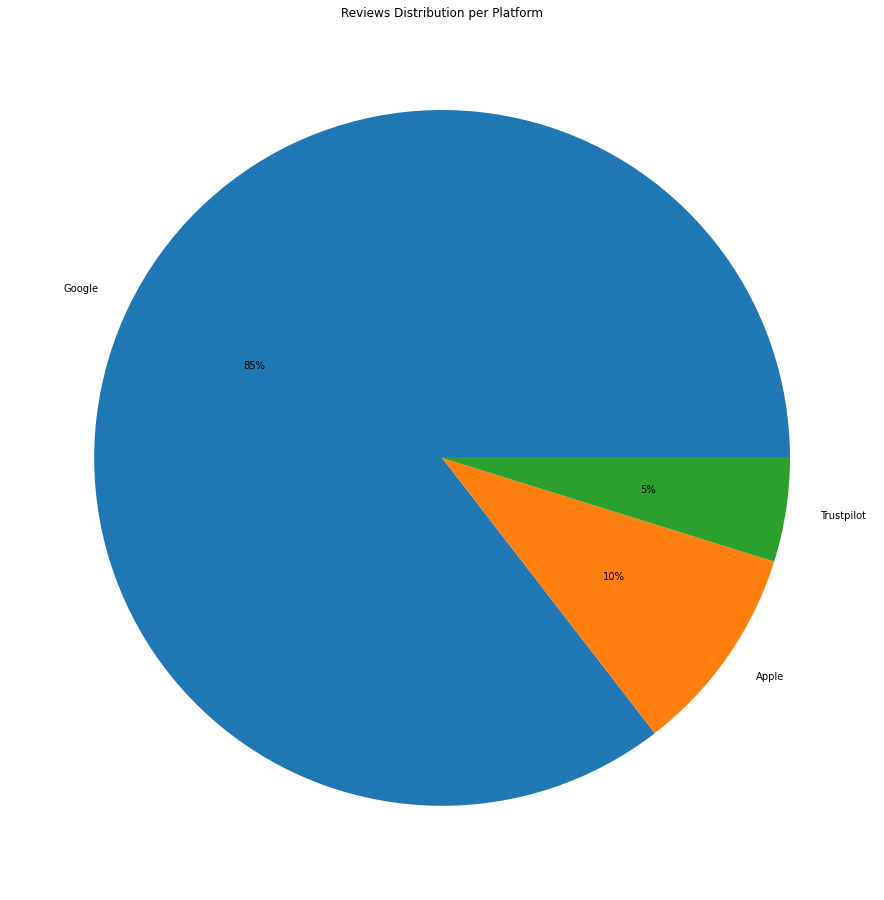

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,16))
plt.pie(df['source'].value_counts(), labels = ['Google','Apple','Trustpilot'],autopct='%1.0f%%')
plt.title('Reviews Distribution per Platform')

Text(0.5, 1.0, 'Reviews Distribution per Rating')

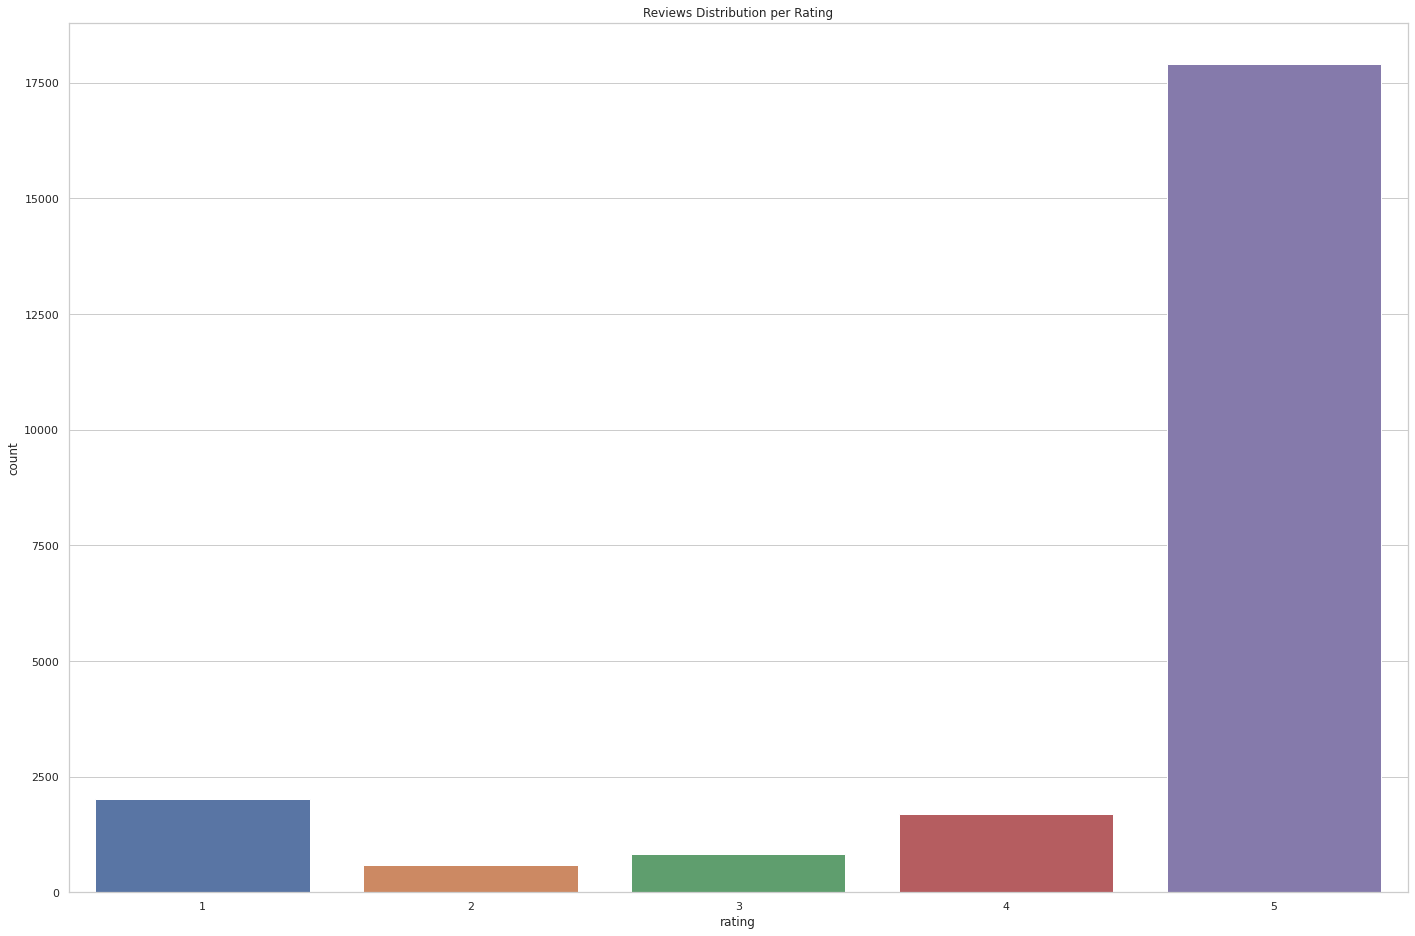

In [ ]:
import seaborn as sns

plt.figure(figsize=(24,16))
sns.set_theme(style="whitegrid")
sns.countplot(x='rating', data=df)
plt.title('Reviews Distribution per Rating')